# Proyecto Sprint 8

## Introducción 

Este proyecto se trara de realizar un caso de análisis de la vida real para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago.

Se cuenta con datos sobre todos los viajes realizados por distintas compañias de taxis en Chicago durante el mes de noviembre de 2017, así como también las condiciones climáticas de mes correspondiente, con el objetivo de identificar si el clima afecta a la decisión de un ciudadano respecto a viajar de un luagr a otro. 
Se idenficicará las principales compañías de taxi que más viajes realizan, así como también los principales barrios donde la gente termina su viaje. 

Adicionalmente, se va a realizar un análisis específico junto a una prueba de hipótesis para idenficiar si los minutos promedio de viajes desde el barrio Loop hasta el aeropuerto O'Hare se ven afectados los días sábados de lluvia y soleados del mes de noviembre. 

In [1]:
#importar liberias a utilizar 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from scipy import stats as st
from scipy.stats import levene

## Paso 4: Análisis exploratorio de datos 

In [2]:
#importar archivos a usar en el paso 4
company_trips = pd.read_csv ('/datasets/project_sql_result_01.csv')
avg_dropoff = pd.read_csv ('/datasets/project_sql_result_04.csv')

In [3]:
#visualizacion de la tabla company_trips 
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


- Las variables de la tabla no contienen valores nulos y sus tipos de datos son correctos 

In [4]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
#se verifica que no hayan compañias duplicadas 
company_trips['company_name'].duplicated().sum()

0

- No se tienen compañias de taxis duplicados, todos son registros únicos. 

In [6]:
#se crea una tabla con las 10 principales compañias con mayor cantidad de viajes 
top10_company= company_trips.sort_values(by = 'trips_amount', ascending = False).head(10)
top10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


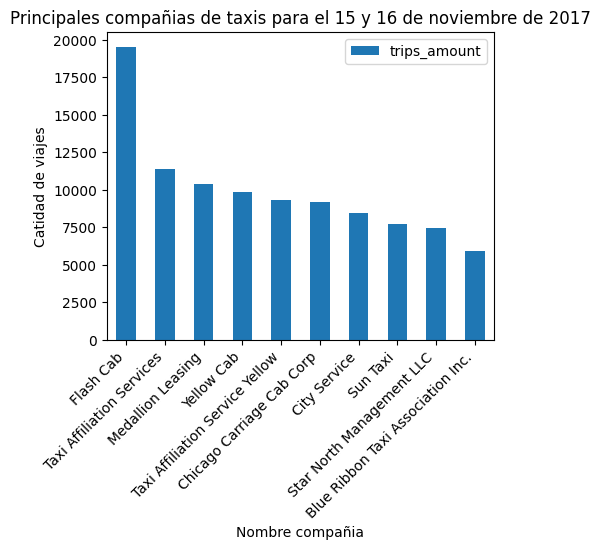

In [7]:
#se crea un gráfico de barras para visualizar las principales compañias de taxis con relación 
#al número de viajes que realizó cada una entre el 16 y 17 de noviembre 
top10_company.plot (x = 'company_name', kind = 'bar', 
                    title = 'Principales compañias de taxis para el 15 y 16 de noviembre de 2017', 
                   xlabel = 'Nombre compañia', 
                   ylabel = 'Catidad de viajes',
                   figsize = (5,4),
                   )
plt.xticks(rotation=45, ha ='right')
plt.show()

- Al analizar las principales compañías de taxis que más viajes han registrado entre el 15 y 16 de noviembre de 2017 está Flash Cab con 19558 recorridos cumplidos y en la posición 10 tenemos a Blue Ribbon Taxi Association Inc. con 5953 viajes fianlizados, lo que vieje a ser apenas el 30% de viajes con relación a Flash Cab. Es importante analizar más a detalle las tarifas que obrece cada compañia, la comodidad, limpieza y seguridad de los carros utilizados en cada viaje para poder tener una idea más clara de la razón por la cual los ciudadanos tienen a Flash Cab como compañia preferida.

In [8]:
#visualizacion de la tabla avg_dropoff
avg_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- Las variables de la tabla avg_dropoff no contienen valores nulos y sus tipos de datos son correctos 

In [9]:
avg_dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
#se verifica que no hayan ubicaciones de dropoff duplicadas 
avg_dropoff['dropoff_location_name'].duplicated().sum()

0

- No se tienen ubicaciones de dropoff duplicados, todos son registros únicos. 

- Al verificar que todos los datos de las tablas con las que se van a trabajar son correctos se pasa al análisis de los mismos. 

In [11]:
#identificar los 10 principales barrios en términos de finalización del recorrido, se ordena el resultado de manera descendente 
top10_dropoff = avg_dropoff.sort_values(by = 'average_trips', ascending = False).head(10)
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


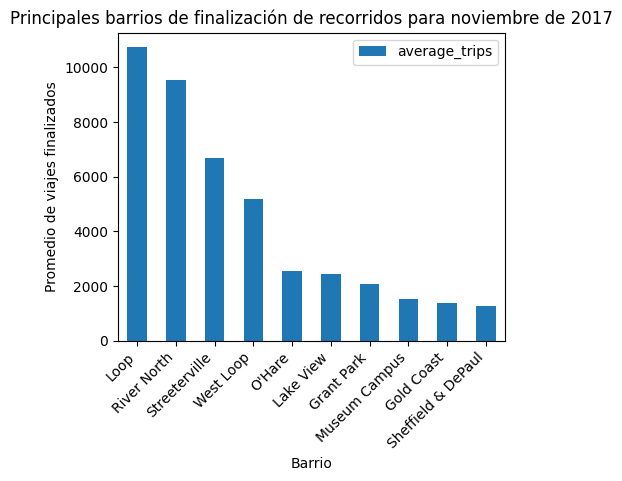

In [12]:
#se crea un gráfico de barras para visualizar los 10 principales barrios de finalización de recorrido 
#respecto al promedio de viajes en cada uno. 
top10_dropoff.plot (x = 'dropoff_location_name', kind = 'bar', 
                    title = 'Principales barrios de finalización de recorridos para noviembre de 2017', 
                   xlabel = 'Barrio', 
                   ylabel = 'Promedio de viajes finalizados',
                   figsize = (5,4),
                   )
plt.xticks(rotation=45, ha ='right')
plt.show()

- Se han identificado los 10 princicales barrios respecto a la finalización del recorrido. Se puede ver que el barrio donde más finalizan los recorridos es Loop con un promedio de 10727 viajes y el barrio en la posición 10 es Sheffield & DePaul con 1259 viajes promedio, muy por dejabo del primer barrio. Existe una gran diferencia de viajes terminados entre estos 2 barrios para el mes de Noviembre del 2017. Se podría analizar que entreneimientos hay en el barrio Loop para saber por qué la gente viaja tanto allá.

## Paso 5. Prueba de hipótesis 

In [13]:
#importar e l archivo a utilizar para la prueba de hipótesis, los registros solo son para todos los sabados de noviembre
trips_loop_ohire = pd.read_csv ('/datasets/project_sql_result_07.csv')

In [14]:
#ver los primeros 1o registros de la tabla 
trips_loop_ohire.tail(10)

,start_ts,weather_conditions,duration_seconds
1058,2017-11-25 12:00:00,Good,1440.0
1059,2017-11-11 10:00:00,Good,1303.0
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0


In [15]:
#ver info general 
trips_loop_ohire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


- No se cuentan con valores nulos para las columnas de mi tabla. Sin embargo, la columa starts_ts es de tipo object por lo que se cambia a formato daytime y la columna duration_seconds a formato int. 

In [16]:
#se verifica que se pueda convertir la columna duration_seconds a entero para no arriesgarse a perder información
np.array_equal (trips_loop_ohire['duration_seconds'], trips_loop_ohire['duration_seconds'].astype('int'))

True

In [17]:
#se convierte la columna duration_seconds a entero
trips_loop_ohire['duration_seconds'] = trips_loop_ohire['duration_seconds'].astype ('int')

In [18]:
#se convierte la columna starts_ts a formato daytime 
trips_loop_ohire['start_ts'] = pd.to_datetime (trips_loop_ohire['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [19]:
#se verifica que se haya realizado los cambios de formatos 
trips_loop_ohire.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds               int64
dtype: object

In [20]:
#se vuele a revisar los primeros registros para ver que los datos sean correctos
trips_loop_ohire.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [21]:
#observar las estadisticas generales para la variable duration_seconds 
trips_loop_ohire.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Prueba de hipótesis

Ho: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos y los sábados de sol.

Ha: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [22]:
#se crearán 2 tablas a partir de la original. 1- con información del clima Good que corresponde a dias soleados 
#y 2- información del clima Bad que corresponde a dias lluviosos.
good = trips_loop_ohire[trips_loop_ohire['weather_conditions'] == 'Good'].reset_index(drop = True)
good

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
883,2017-11-11 06:00:00,Good,1500
884,2017-11-25 11:00:00,Good,0
885,2017-11-11 10:00:00,Good,1318
886,2017-11-11 13:00:00,Good,2100


In [23]:
#se crea la tabla para el clima con descripcion Bad
bad = trips_loop_ohire[trips_loop_ohire['weather_conditions'] == 'Bad'].reset_index(drop = True)
bad

,start_ts,weather_conditions,duration_seconds
0,2017-11-04 16:00:00,Bad,2969
1,2017-11-18 12:00:00,Bad,1980
2,2017-11-04 17:00:00,Bad,2460
3,2017-11-04 16:00:00,Bad,2760
4,2017-11-18 12:00:00,Bad,2460
...,...,...,...
175,2017-11-18 12:00:00,Bad,2560
176,2017-11-18 10:00:00,Bad,1908
177,2017-11-18 12:00:00,Bad,2400
178,2017-11-18 16:00:00,Bad,2186


In [24]:
#se calcula la varianza de la tabla Good
var_good = np.var (good['duration_seconds'])
var_good

575732.9308497686

In [25]:
#Se calcula la varianza de la tabla Bad
var_bad = np.var (bad['duration_seconds'])
var_bad

517403.56330246915

In [26]:
# Realizar la prueba de Levene para verificar estadísticamente que las varianzas son diferentes 
stat, p_value = levene(good['duration_seconds'], bad['duration_seconds'])

# Imprimir los resultados
print('Estadístico de Levene:', stat)
print('Valor p:', p_value)

# Definir el nivel de significancia
alpha = 0.05

# Comparar el valor p con el nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las varianzas son diferentes.")
else:
    print("No rechazamos la hipótesis nula: las varianzas son iguales.")

Estadístico de Levene: 0.38853489683656073
Valor p: 0.5332038671974493
No rechazamos la hipótesis nula: las varianzas son iguales.


- Al realizar la prueba de levene, se puede confirma que estadísticamente las varianzas son iguales y no nos podemos basar en el cálculo aritmético de las varianzas. De esta manera se puede realizar una prueba de hipótesis para 2 poblaciones con varianzas iguales. 

- Para probar la hipótesis se selecciona un nivel de significancia de 0.05, considerando que es un valor apropiado para determinar si los resultados son significativos. 
- Se dedice realizar una prueba de igualdad de medias de 2 poblaciones con varianza diferente ya que se quiere identificar si existe diferencia es el tiempo promedio de viajes cuando el clima es bueno y cuando el clima es malo, siendo estas mis 2 poblaciones. Además solo se desea saber si hay diferencias entre medias, mas nó saber si la una es mayor a la otra. 
- Si mi valor p es menor a alpha, se rechaza la hopótesis nula.

Ho: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos y los sábados de sol.

Ha: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [28]:
#prueba de hipótesis 
alpha = 0.05 

results = st.ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var = True)
print ('valor_p:', results.pvalue)

if (results.pvalue < alpha):
    print ("Se rechaza la hipótesis nula")
else:
    print ("No se puede rechazar la hipótesis nula")

valor_p: 6.517970327099473e-12
Se rechaza la hipótesis nula


- Después de realizar la prueba de hipótesis y obtener el resultado, se puede concluir que se rechaza la hipóteis nula sobre que la duración promedio de los viajes los días sabados del mes de noviembre del 2017 en días lluviosos y días soleados es igual. Esto quiere decir que existe una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el aeropuerto y que se ve afecta por el condiciones climáticas de cada día. Para complementar este resultado se podría analizar si los días que llueve va menos gente al aeropuerto, o si prefieren utilizar otro método de transporte. O también se podría analizar si las personas se ven influenciadas en las predicciones del clima para el día en el que compran sus pasajes. 
